In [37]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_CIV/'
rr = np.arange(12, 17, 1, dtype=np.float128)
atom_N = [13,20,32,50,79]
total_N_c = np.outer(10**rr, atom_N) / 10
total_N_c = total_N_c.flatten()

emit = np.arange(100,700,100)
emit = np.append([1,50],emit)

expand_vel = np.arange(0,1100,100)

random_vel= [11.8,30,50,100,150]


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return  FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

3.39e+13


In [38]:
check = 0
for ii, index in enumerate(rr):
    index = int(index)
    for jj, atom in enumerate(atom_N):
        atom = int(atom)
        for kk, v_rand in enumerate(random_vel):
            if v_rand == 11.8:
                v_rand = int(v_rand * 10)
                v_rand_title = int(v_rand)
                v_rand_index = 1
            elif v_rand < 100 and v_rand > 15:
                D = int(v_rand * 10)
                v_rand_index = 1
            else:
                v_rand_title = int(v_rand)
                v_rand_index = 2
            for oo,expand_v in enumerate(expand_vel):
                if expand_v == 0:
                    expand_title = '000'
                    expand_index = 0
                elif expand_v >= 1000:
                    expand_title = int(expand_v/10)
                    expand_index= 3
                else :
                    expand_title = expand_v
                    expand_index = 2
                for mm, emit_v in enumerate(emit):
                    if emit_v == 1 :
                        emit_title = 100
                        emit_index = 0
                    elif emit_v >= 1000:
                        emit_title = int(emit_v/10)
                        emit_index = 3 
                    elif emit_v < 100  and emit_v > 1:
                            emit_title = int(emit_v * 10)
                            emit_index = 1
                    else :
                        emit_title = emit_v
                        emit_index = 2

                    path_sp= f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec_com.dat'

                    path_sp_dat = f'{directory_1}N_atom{atom}0E+{index}_Vexp{expand_title}E+0{expand_index}_Vemit{emit_title}E+0{emit_index}_tauD000E+00_Vran{v_rand_title}E+0{v_rand_index}spec.dat'

                    try:
                        data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                        data_sp_dat = pd.read_csv(path_sp_dat, sep='\s+', header=None)
                    except FileNotFoundError:
                        print(f"파일을 찾을 수 없습니다: {path_sp}")
                        print(f"파일을 찾을 수 없습니다: {path_sp_dat}")
                        check += 1
                        continue

                    globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = pd.read_csv(path_sp_dat, sep='\s+', header=None)

                    globals()[f'lam_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][0]
                    globals()[f'K_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][1]
                    globals()[f'H_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][2]
                    globals()[f'K_sct_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][3]
                    globals()[f'H_sct_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] = globals()[f'data_sp_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'][4]

print(check)

0


(-0.5, 0.5)

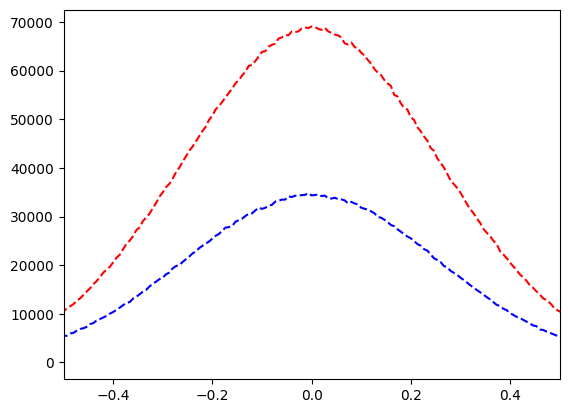

In [66]:
atom = 50
index = 12
expand_v = 500
v_rand = 118
emit_v = 50

plt.plot(globals()[f'lam_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] , globals()[f'K_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'],'r--' )

plt.plot(globals()[f'lam_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] , globals()[f'H_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'],'b--' )


plt.xlim(-0.5,0.5)


(0.0, 3.0)

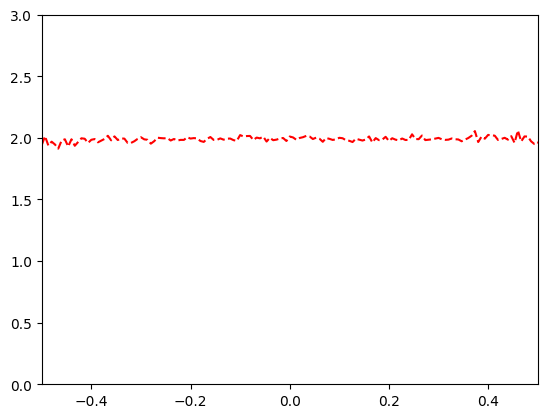

In [68]:
plt.plot(globals()[f'lam_dat_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'] , globals()[f'K_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}']/globals()[f'H_int_{atom}_{index}_{expand_v}_{v_rand}_{emit_v}'],'r--' )
plt.xlim(-0.5,0.5)
plt.ylim(0,3)
